In [89]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [34]:
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [25]:
df = pd.DataFrame(pd.read_csv('india_rural.txt',sep='\t',skiprows=(0),header=(0),low_memory=False))

In [35]:
df.head()

,household_id,q002_supervisor,q000_interviewer_id,q001_interviewer,q003_date,q004_time,q006_state_code,q007_state,q008_district_code,q009_district,q010_block,q011_village_code,q012_village,q013_hamlet,q101_survey_taken,q101_survey_none_reason,q102_decisionmakerYN,q201_gender,q202_age,q203_married,q204_adults,q205_adult_females,q205_a_working_females,q206_children,q206_a_children_male,q206_b_children_abv14,q207_ppl_studying,q208_edu,q209_religion,q209_religion_other,q210_caste,q210_caste_other,q211_ration_card,q212_income_source,q212_income_source_other,q213_bankac,q214_hh_expenses,q215_annual_income,q215_hh_indebted,q216_a_hh_debt,q217_decisionmakers,q217_decisionmakers_others,q218_land_ownership,q218_a_land_owned,q218_a_land_units,q219_house_owned,q220_house_type,q221_a_room,q221_b_bicycle,q221_c_motorcycle,q221_d_tractor_car,q221_e_toilets,q222_cooking_fuels_1,q222_cooking_fuels_2,q222_cooking_fuels_3,q222_cooking_fuels_4,q222_cooking_fuels_others,q223_a_cow.buffalo,q223_b_fowls_chickens,q223_c_goats,q224_business_interests,q224_a_business_barriers,q224_a_business_barriers_1,q224_a_business_barriers_2,q224_a_business_barriers_3,q224_a_business_barriers_4,q224_a_business_barriers_others,q301_grid_use,q301_a_grid_hamlet,q301_b_no_grid_reason1,q301_b_no_grid_reason2,q301_b_no_grid_reason3,q301_b_no_grid_reason4,q301_b_no_grid_reason5,q301_b_no_grid_reason6,q301_b_no_grid_reason7,q301_b_no_grid_reason_others,q301_c_dist_pole,q302_grid_years,q302_grid_months,q303_grid_initial_cost,q304_grid_meter,q305_grid_bill_freq,q305_grid_bill_freq_other,q305_a_grid_bill_type,q306_grid_bill_avail,q306_a_grid_bill_MMYY,q306_b_grid_bill_days,q306_c_grid_bill_amt1,q306_d_grid_bill_units,q307_grid_bill_amt2,q308_grid_hours,q309_grid_hours_eve,q310_grid_nopower,q311_grid_app_damage,q312_grid_vol_low,q316_shs_heard,q317_shs_use,q318_shs_brand,q319_shs_years,q319_shs_months,q320_shs_watt,q321_shs_cost,q322_shs_hours,q324_battery_use,q325_battery_brand_L,q326_battery_ah,q327_battery_cost,q328_battery_charge_mode,q328_battery_charge_mode1,q328_battery_charge_mode2,q328_battery_charge_mode3,q328_battery_charge_mode_others,q329_battery_charge_freq,q330_battery_charge_cost,q331_battery_hours,q334_mgrid_heard,q334_a_mgrid_heard_source1,q334_a_mgrid_heard_source2,q334_a_mgrid_heard_source3,q334_a_mgrid_heard_source4,q334_a_mgrid_heard_source5,q334_a_mgrid_heard_source6,q334_a_mgrid_heard_source7,q334_a_mgrid_heard_source8,q334_a_mgrid_heard_sourceother,q335_mgrid_use,q335_a_mgrid_hamlet,q335_b_mgrid_use_before,q335_c_mgrid_reason_no_use1,q335_c_mgrid_reason_no_use2,q335_c_mgrid_reason_no_use3,q335_c_mgrid_reason_no_use4,q335_c_mgrid_reason_no_use5,q335_c_mgrid_reason_no_useother,q336_mgrid_years,q336_mgrid_months,q337_mgrid_initial_cost,q338_mgrid_meter,q339_mgrid_bill_type,q340_mgrid_bill_avail,q340_a_mgrid_bill_MMYY,q340_b_mgrid_bill_days,q340_c_mgrid_bill_amt1,q340_d_mgrid_bill_units,q340_e_mgrid_bill_amt2,q341_mgrid_hours,q345_dg_use,q346_dg_hours,q347_dg_per1_connec2,q347_dg_connec2_expense,q347_dg_per1_cost,q348_dg_per1_diesel_amt,q349_dg_per1_disel_price,q350_dg_per1_disel_dist,q351_dg_per1_disel_repaircost,q352_elec_primary_source,q353_elec_satisfied_,q401_kero_use_,q401_a_kero_noreason,q401_a_kero_noreason1,q401_a_kero_noreason2,q401_a_kero_noreason3,q401_a_kero_noreason4,q401_a_kero_noreason5,q401_a_kero_noreason6,q401_a_kero_noreasonother,q402_kero_purpose,q402_kero_purpose1,q402_kero_purpose2,q402_kero_purpose3,q402_kero_purpose4,q402_kero_purposeother,q403_kero_pds_ltr,q404_kero_pds_price,q405_kero_market_YN,q405_a_kero_marketltr,q405_b_kero_marketprice,q406_kero_wicks,q407_kero_lanterns,q408_kero_hours_total,q409_kero_nonlightuse_ltr,q410_kero_harmful,q411_sl_heard,q412_sl_use,q413_a_sl_years,q413_b_sl_months,q414_sl_number,q415_sl_cost_total,q416_a_sl_hours_home,q416_b_sl_hours_outside,q417_light_othersources,q417_light_othersources1,q417_light_othersources2,q417_light_othersources3,q417_light_othersources4,q418_light_othersources_hours,q419

In [39]:
cols = df.columns.tolist()

In [47]:
len(cols)

561

In [48]:
no_value_cols = df.columns[(df.isnull()).all()]

In [46]:
len(no_value_cols)

71

In [50]:
df.drop(df[no_value_cols],axis=1,inplace=True)

In [51]:
len(df.columns)

490

In [59]:
cols_to_drop =['q002_supervisor','q000_interviewer_id','q001_interviewer','q004_time','q010_block','q209_religion',
               'q210_caste','q210_caste_other']

In [60]:
df.drop(columns=cols_to_drop,axis=1,inplace=True)

In [66]:
df.head()

,household_id,q003_date,q006_state_code,q007_state,q008_district_code,q009_district,q011_village_code,q012_village,q013_hamlet,q101_survey_taken,q102_decisionmakerYN,q201_gender,q202_age,q203_married,q204_adults,q205_adult_females,q205_a_working_females,q206_children,q206_a_children_male,q206_b_children_abv14,q207_ppl_studying,q208_edu,q211_ration_card,q212_income_source,q212_income_source_other,q213_bankac,q214_hh_expenses,q215_annual_income,q215_hh_indebted,q216_a_hh_debt,q217_decisionmakers,q218_land_ownership,q218_a_land_owned,q218_a_land_units,q219_house_owned,q220_house_type,q221_a_room,q221_b_bicycle,q221_c_motorcycle,q221_d_tractor_car,q221_e_toilets,q222_cooking_fuels_1,q222_cooking_fuels_2,q222_cooking_fuels_3,q222_cooking_fuels_others,q223_a_cow.buffalo,q223_b_fowls_chickens,q223_c_goats,q224_business_interests,q224_a_business_barriers,q224_a_business_barriers_1,q224_a_business_barriers_2,q224_a_business_barriers_3,q224_a_business_barriers_others,q301_grid_use,q301_a_grid_hamlet,q301_b_no_grid_reason1,q301_b_no_grid_reason2,q301_b_no_grid_reason3,q301_b_no_grid_reason4,q301_b_no_grid_reason_others,q301_c_dist_pole,q302_grid_years,q302_grid_months,q303_grid_initial_cost,q304_grid_meter,q305_grid_bill_freq,q305_grid_bill_freq_other,q305_a_grid_bill_type,q306_grid_bill_avail,q306_a_grid_bill_MMYY,q306_b_grid_bill_days,q306_c_grid_bill_amt1,q306_d_grid_bill_units,q307_grid_bill_amt2,q308_grid_hours,q309_grid_hours_eve,q310_grid_nopower,q311_grid_app_damage,q312_grid_vol_low,q316_shs_heard,q317_shs_use,q318_shs_brand,q319_shs_years,q319_shs_months,q320_shs_watt,q321_shs_cost,q322_shs_hours,q324_battery_use,q325_battery_brand_L,q326_battery_ah,q327_battery_cost,q328_battery_charge_mode,q328_battery_charge_mode1,q329_battery_charge_freq,q330_battery_charge_cost,q331_battery_hours,q334_mgrid_heard,q334_a_mgrid_heard_source1,q334_a_mgrid_heard_source2,q334_a_mgrid_heard_source3,q334_a_mgrid_heard_source4,q335_mgrid_use,q335_a_mgrid_hamlet,q335_b_mgrid_use_before,q335_c_mgrid_reason_no_use1,q336_mgrid_years,q336_mgrid_months,q337_mgrid_initial_cost,q338_mgrid_meter,q339_mgrid_bill_type,q340_mgrid_bill_avail,q341_mgrid_hours,q345_dg_use,q346_dg_hours,q347_dg_per1_connec2,q347_dg_connec2_expense,q347_dg_per1_cost,q348_dg_per1_diesel_amt,q349_dg_per1_disel_price,q350_dg_per1_disel_dist,q351_dg_per1_disel_repaircost,q352_elec_primary_source,q353_elec_satisfied_,q401_kero_use_,q401_a_kero_noreason,q401_a_kero_noreason1,q401_a_kero_noreason2,q401_a_kero_noreason3,q401_a_kero_noreason4,q401_a_kero_noreasonother,q402_kero_purpose,q402_kero_purpose1,q402_kero_purpose2,q402_kero_purpose3,q403_kero_pds_ltr,q404_kero_pds_price,q405_kero_market_YN,q405_a_kero_marketltr,q405_b_kero_marketprice,q406_kero_wicks,q407_kero_lanterns,q408_kero_hours_total,q409_kero_nonlightuse_ltr,q410_kero_harmful,q411_sl_heard,q412_sl_use,q413_a_sl_years,q413_b_sl_months,q414_sl_number,q415_sl_cost_total,q416_a_sl_hours_home,q416_b_sl_hours_outside,q417_light_othersources,q417_light_othersources1,q417_light_othersources4,q418_light_othersources_hours,q419_light_othersources_expenses,q420_light_primary_source,q420_light_primary_sourceother,q421_a_light_satisfied,q421_a_light_unsatisfied_reason,q421_a_light_unsatisfied_reason1,q421_a_light_unsatisfied_reason2,q421_a_light_unsatisfied_reason3,q421_a_light_unsatisfied_reason4,q501_appl_used,q501_appl_used1,q501_appl_used2,q501_appl_used3,q501_appl_used4,q501_appl_used5,q501_appl_used6,q501_appl_used7,q501_appl_used8,q501_appl_used9,q501_appl_used10,q501_appl_used11,q501_appl_used12,q501_appl_used13,q501_appl_used14,q501_A_a_num_Incadesbulb,q501_A_b_watt_Incadesbulb,q501_A_c_brand_Incadesbulb,q501_A_d_tod_Incadesbulb,q501_A_d_tod1_Incadesbulb,q501_A_d_tod2_Incadesbulb,q501_A_d_tod3_Incadesbulb,q501_A_d_tod4_Incadesbulb,q501_A_e_hrs_Incadesbulb,q501_A_e_min_Incadesbulb,q501_B_a_num_CFL,q501_B_b_watt_CFL,q501_B_c_brand_CFL,q501_B_d_tod_CFL,q501_B_d_tod1_CFL,q501_B_d_tod2_CFL,q501_B_d_tod3_CFL,q501_B_e_hrs_CFL,q501_B_

In [74]:
# cleaning up columns names
new_col_names = []
for col in df.columns:
    if col =='household_id':
        pass
    else:
        col = col.lstrip(col[:5])
        new_col_names.append(col)
        
new_col_names.insert(0,'household_id')

In [78]:
df.columns = new_col_names

In [117]:
df_grid_use = pd.DataFrame(df[['state','grid_use','grid_hours','mgrid_use']])

In [125]:
df_grid_use.drop(columns='mgrid_use',axis=1,inplace=True)

In [106]:
# no. of hours of power for those connected to grid
hours_grid = df_grid_use[df_grid_use['grid_use'] == 1]

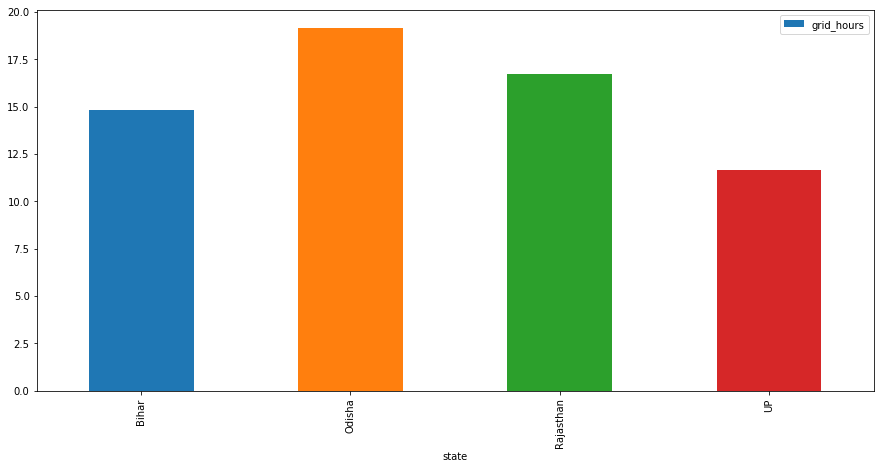

In [110]:
# Avg. no. of hours of electricity per day through grid
fig2, ax2 = plt.subplots(figsize=(15,7))

hours_grid.groupby('state')['grid_hours'].mean().plot(kind='bar',ax=ax2)
ax2.legend(loc='upper right')

In [157]:
demand_variables =['hh_expenses','income_source','grid_initial_cost',
                  'grid_bill_amt2','annual_income', 'appl_used1','appl_want1','edu']


In [158]:
df[demand_variables]

,hh_expenses,income_source,grid_initial_cost,grid_bill_amt2,annual_income,appl_used1,appl_want1,appl_want1,edu
0,15000.00,1,700.00,nan,100000.00,c,NaN,NaN,2
1,7000.00,1,nan,500.00,120000.00,c,NaN,NaN,6
2,5000.00,1,21.00,1500.00,100000.00,c,NaN,NaN,2
3,5000.00,1,nan,nan,60000.00,c,NaN,NaN,3
4,5000.00,1,nan,500.00,90000.00,c,NaN,NaN,2
5,9000.00,4,0.00,1900.00,150000.00,a,NaN,NaN,1
6,5000.00,1,nan,300.00,80000.00,c,NaN,NaN,3
7,5000.00,1,nan,1500.00,100000.00,c,NaN,NaN,3
8,6000.00,1,600.00,540.00,80000.00,a,NaN,NaN,3
9,3000.00,1,nan,300.00,50000.00,c,NaN,NaN,2
